
### The relevant Dataset (CIFAR 10) have been described below.




- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)

- CIFAR-10 is widely used for machine learning and computer vision applications. 

- The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

- The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

- Images have low resolution (32x32). 

- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

Read the website thoroughly, it has a python version of the file and also the code needed to read the file. It also describes the way the dataset is arranged.


# CIFAR-10 Image label detection of provided images



## Part-1
## Prepare a model from the CIFAR-10 dataset using CNN+KERAS. Use 2 Convolution Layers and subsamplings before creating the Neural Model. Choose 512 neurons in the 1st layer and a dropout of 25% in the 2nd hidden layer before using softmax at the end to obtain the labels. Use 'RELU' in the internal layers as activation function. Use Adam as the optimizer and CROSS-Entropy as the loss function. Use 'Accuracy' as the metrics. [10 Marks]
## Download the 5 images provided on D2L. These images are of dog,cat,airplane,automobile and truck. Create a validation dataset using these images and predict the labels using the model of CIFAR-10 created by you as above. [5 Marks]

In [ ]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
import matplotlib
import keras
from matplotlib import pyplot
from keras.datasets import cifar10

In [ ]:
(trainX, trainy), (testX, testy) = cifar10.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
trainy = tensorflow.keras.utils.to_categorical(trainy, 10)
testy = tensorflow.keras.utils.to_categorical(testy, 10)

In [ ]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255

Prepare a model from the CIFAR-10 dataset using CNN+KERAS. Use 2 Convolution Layers and subsamplings before creating the Neural Model. Choose 512 neurons in the 1st layer and a dropout of 25% in the 2nd hidden layer before using softmax at the end to obtain the labels. Use 'RELU' in the internal layers as activation function. Use Adam as the optimizer and CROSS-Entropy as the loss function. Use 'Accuracy' as the metrics. [10 Marks]


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32,32,3)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               6423040   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)              

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(trainX, trainy,
                    batch_size=64,
                    epochs=10,
                    verbose=2,
                    validation_data=(testX, testy))

Epoch 1/10
782/782 - 5s - loss: 1.3550 - accuracy: 0.5129 - val_loss: 1.1116 - val_accuracy: 0.6049
Epoch 2/10
782/782 - 5s - loss: 0.9878 - accuracy: 0.6516 - val_loss: 0.9392 - val_accuracy: 0.6731
Epoch 3/10
782/782 - 5s - loss: 0.8043 - accuracy: 0.7175 - val_loss: 0.9251 - val_accuracy: 0.6749
Epoch 4/10
782/782 - 5s - loss: 0.6545 - accuracy: 0.7712 - val_loss: 0.8618 - val_accuracy: 0.7019
Epoch 5/10
782/782 - 5s - loss: 0.5175 - accuracy: 0.8167 - val_loss: 0.8605 - val_accuracy: 0.7125
Epoch 6/10
782/782 - 5s - loss: 0.3977 - accuracy: 0.8598 - val_loss: 0.9112 - val_accuracy: 0.7024
Epoch 7/10
782/782 - 5s - loss: 0.3071 - accuracy: 0.8930 - val_loss: 0.9305 - val_accuracy: 0.7165
Epoch 8/10
782/782 - 5s - loss: 0.2448 - accuracy: 0.9147 - val_loss: 1.0466 - val_accuracy: 0.7144
Epoch 9/10
782/782 - 5s - loss: 0.2023 - accuracy: 0.9290 - val_loss: 1.0426 - val_accuracy: 0.7175
Epoch 10/10
782/782 - 5s - loss: 0.1815 - accuracy: 0.9365 - val_loss: 1.0870 - val_accuracy: 0.7140

In [ ]:
score = model.evaluate(testX, testy, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0869797468185425
Test accuracy: 0.7139999866485596


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import keras
from keras.preprocessing import image
from keras.applications import resnet50
#from keras.applications import 

following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

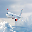

In [ ]:
img1 = image.load_img("drive/MyDrive/airplane.jpg", target_size=(32, 32))
img1

In [ ]:
x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)
model.predict(x1)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

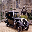

In [ ]:
img2 = image.load_img("drive/MyDrive/automobile.jpg", target_size=(32, 32))
img2
#old school car

In [ ]:
x2 = image.img_to_array(img2)
x2 = np.expand_dims(x2, axis=0)
model.predict(x2)
#recognized as truck. but due to size of old school car, this is ok

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

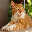

In [ ]:
img3 = image.load_img("drive/MyDrive/cat.jpg", target_size=(32, 32))
img3

In [ ]:
x3 = image.img_to_array(img3)
x3 = np.expand_dims(x3, axis=0)
model.predict(x3)
#predicted dog -> not good

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

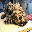

In [ ]:
img4 = image.load_img("drive/MyDrive/dog.jpg", target_size=(32, 32))
img4

In [ ]:
x4 = image.img_to_array(img4)
x4 = np.expand_dims(x4, axis=0)
model.predict(x4)
#frog predicted from mummified siberian puppy

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

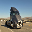

In [ ]:
img5 = image.load_img("drive/MyDrive/truck.jpg", target_size=(32, 32))
img5

In [ ]:
x5 = image.img_to_array(img5)
x5 = np.expand_dims(x5, axis=0)
model.predict(x5)
#gave truck

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# RESNET50 Image Label detection of the provided images
## Part-2

## Use Resnet50 pre-trained model as shown in the class to predict the nearest labels for the 5 images provided on D2L. The same images used in part-1 for validation. [5 Marks]

In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.applications import resnet50

In [ ]:
model2 = resnet50.ResNet50()

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
plane = image.load_img("drive/MyDrive/airplane.jpg", target_size=(224, 224))
car = image.load_img("drive/MyDrive/automobile.jpg", target_size=(224, 224))
cat = image.load_img("drive/MyDrive/cat.jpg", target_size=(224, 224))
dog = image.load_img("drive/MyDrive/dog.jpg", target_size=(224, 224))
truck = image.load_img("drive/MyDrive/truck.jpg", target_size=(224, 224))

In [ ]:
plane = image.img_to_array(plane)

In [ ]:
plane.shape

In [ ]:
plane = np.expand_dims(plane, axis=0)

In [ ]:
plane.shape

In [ ]:
plane = resnet50.preprocess_input(plane)
predictions1 = model2.predict(plane)

In [ ]:
predicted_classes = resnet50.decode_predictions(predictions1, top=3)

In [ ]:
print("This is an image of:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print(" - {}: {:2f} likelihood".format(name, likelihood))

In [ ]:
car = image.img_to_array(car)
car = np.expand_dims(car, axis=0)
car = resnet50.preprocess_input(car)
predictions2 = model2.predict(car)

In [ ]:
predicted_classes = resnet50.decode_predictions(predictions2, top=3)

print("This is an image of:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print(" - {}: {:2f} likelihood".format(name, likelihood))

In [ ]:
cat = image.img_to_array(cat)
cat = np.expand_dims(cat, axis=0)
cat = resnet50.preprocess_input(cat)
predictions3 = model2.predict(cat)

In [ ]:
predicted_classes = resnet50.decode_predictions(predictions3, top=3)

print("This is an image of:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print(" - {}: {:2f} likelihood".format(name, likelihood))

In [ ]:
dog = image.img_to_array(dog)
dog = np.expand_dims(dog, axis=0)
dog = resnet50.preprocess_input(dog)
predictions4 = model2.predict(dog)

In [ ]:
predicted_classes = resnet50.decode_predictions(predictions4, top=3)

print("This is an image of:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print(" - {}: {:2f} likelihood".format(name, likelihood))

In [ ]:
truck = image.img_to_array(truck)
truck = np.expand_dims(truck, axis=0)
truck = resnet50.preprocess_input(truck)
predictions5 = model2.predict(truck)

In [ ]:
predicted_classes = resnet50.decode_predictions(predictions5, top=3)

print("This is an image of:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print(" - {}: {:2f} likelihood".format(name, likelihood))